##### Install the library

In [2]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame({
    'id': range(1,101),
    'value': np.random.randint(1,100, 100),
    'class':['A'] * 100
})

In [7]:
df

,id,value,class
0,1,18,A
1,2,99,A
2,3,98,A
3,4,67,A
4,5,45,A
...,...,...,...
95,96,34,A
96,97,47,A
97,98,63,A
98,99,90,A


In [9]:
df['class'].value_counts()

class
A    100
Name: count, dtype: int64

In [11]:
df.iloc[5,2] = 'B'
df.iloc[47,2] = 'B'
df.iloc[61,2] = 'B'
df.iloc[83,2] = 'B'
df.iloc[94,2] = 'B'

In [12]:
df['class'].value_counts()

class
A    95
B     5
Name: count, dtype: int64

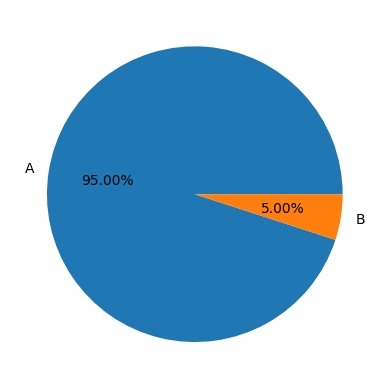

In [14]:
plt.pie(df['class'].value_counts(), labels=df['class'].value_counts().index, autopct='%2.2f%%');

##### Under sampling

In [16]:
from imblearn.under_sampling import RandomUnderSampler

In [17]:
rus = RandomUnderSampler(random_state=0)

In [20]:
df_new, output = rus.fit_resample(df.drop('class', axis=1), df['class'])

In [23]:
df_new['class'] = output

In [24]:
df_new

,id,value,class
2,3,98,A
31,32,40,A
58,59,98,A
17,18,40,A
14,15,2,A
5,6,6,B
47,48,10,B
61,62,49,B
83,84,92,B
94,95,52,B


##### Random Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
ros = RandomOverSampler(random_state=0)

In [28]:
df_new, output = ros.fit_resample(df.drop('class', axis=1), df['class'])

In [29]:
df_new['class'] = output

In [30]:
df_new

,id,value,class
0,1,18,A
1,2,99,A
2,3,98,A
3,4,67,A
4,5,45,A
...,...,...,...
185,6,6,B
186,48,10,B
187,62,49,B
188,95,52,B


In [31]:
df_new[df_new['class'] == 'B']

,id,value,class
5,6,6,B
47,48,10,B
61,62,49,B
83,84,92,B
94,95,52,B
...,...,...,...
185,6,6,B
186,48,10,B
187,62,49,B
188,95,52,B


In [32]:
df_new['class'].value_counts()

class
A    95
B    95
Name: count, dtype: int64

##### SMOTE Resampling

In [34]:
from imblearn.over_sampling import SMOTE

In [39]:
smo = SMOTE(random_state=0)

In [41]:
df.iloc[24,2] = 'B'

In [42]:
df_new, output = smo.fit_resample(df.drop('class', axis=1), df['class'])

In [43]:
df_new['class'] = output

In [44]:
df_new

,id,value,class
0,1,18,A
1,2,99,A
2,3,98,A
3,4,67,A
4,5,45,A
...,...,...,...
183,40,23,B
184,42,18,B
185,52,19,B
186,49,14,B


In [45]:
df_new['class'].value_counts()

class
A    94
B    94
Name: count, dtype: int64